**References**

https://andhint.github.io/machine-learning/nlp/Feature-Extraction-From-Text/


# Tweet Sentiment Classification

## Objective

Determine whether the sentiment on the Tweets related to a product or company is positive, negative or neutral.

## Classification Techniques

### A1. Supervised Learning

*** Step 1: Using Manually Labelled Tweet Sentiments for Supervised Training*** 

In [23]:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"
from IPython.display import HTML, display

In [24]:
import pandas as pd
import numpy as np

np.random.seed(7)

print("[INFO] Data Frame created with Manually-labelled data for individual stocks")
aapl=pd.read_csv("/Users/hardeepsingh/Desktop/IS/University/sem-4/FE-520/Project/Manually_labelled_clean_aapl.csv")

print("\n[INFO] Apple Data Frame - Manually Labelled Sentiments")
aapl.info()

aapl=aapl.dropna()

[INFO] Data Frame created with Manually-labelled data for individual stocks

[INFO] Apple Data Frame - Manually Labelled Sentiments
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3977 entries, 0 to 3976
Data columns (total 3 columns):
date         3977 non-null object
sentiment    3969 non-null float64
text         3977 non-null object
dtypes: float64(1), object(2)
memory usage: 93.3+ KB


***  Step 2: Splitting the Data into Train (for Model training) and Test (for validation)*** 

In [25]:
from sklearn.model_selection import train_test_split

text=aapl.text
target=aapl.sentiment

X_train,X_test,y_train,y_test=train_test_split(text,target, random_state=27,test_size=0.2)

***  Step 3: Selecting the best Model*** 

#### WordCloud Of Tweets

<Figure size 432x288 with 0 Axes>

(-0.5, 1199.5, 999.5, -0.5)

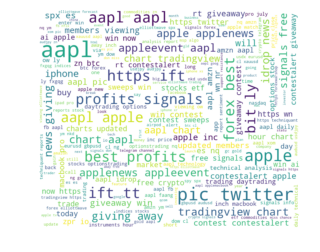

In [26]:
# REFERENCE: https://github.com/amueller/word_cloud
from os import path
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt

d = path.dirname('manually_labeled_data/')

# Read the whole text.
text1 = open(path.join(d,'/Users/hardeepsingh/Desktop/IS/University/sem-4/FE-520/Project/Manually_labelled_clean_aapl.csv')).read()

stopwords = set(STOPWORDS)

# lower max_font_size
wordcloud = WordCloud(max_font_size=100,
                          background_color='white',
                          width=1200,
                          height=1000,
                     stopwords=stopwords).generate(text1)
plt.figure()
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()


* **Choice 1: CountVectorizer OR TfidfVectorizer (both from sklearn.feature_extraction.text)**
    * CountVectorizer takes the bag of word approach, i.e. each message is seperated into tokens and the number of times each token occurs in a message is counted. It create a matrix populated with token counts to represent all the messages. This is often referred to as a document term matrix(DTM).
    *  TfidfVectorizer, instead of filling the DTM with token counts it calculates term frequency-inverse document frequency value for each word(TF-IDF). The TF-IDF is the product of two weights, the term frequency and the inverse document frequency. Term frequency is a weight representing how often a word occurs in a document. If we have several occurences of the same word in one document we can expect the TF-IDF to increase. Inverse document frequency is another weight representing how common a word is across documents. If a word is used in many documents then the TF-IDF will decrease.

* **Choice 2: Classifier**
    * LogisticRegression
    * DecisionTree
    * MultinomialNB
    * Linear SVC

** i. CountVectorizer + Logistic Regression **

In [27]:
# importing required libraries
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
import warnings
warnings.filterwarnings('ignore')

# import GridSearch
from sklearn.model_selection import GridSearchCV

# To store the results
classifier_results={}

# using count vectorizer instead of tfidf
# tokenizing only alpha numeric
tokenPatt = '[A-Za-z0-9]+(?=\\s+)'

# pipeline which does two steps all together:
# (1) generate CountVector, and (2) train classifier
# each step is named, i.e. "vec", "clf"
pl_1 = Pipeline([
        ('tfidf', CountVectorizer(token_pattern = tokenPatt)),
        ('clf', LogisticRegression())])

pl_1.fit(X_train,y_train)

# accuracy
accuracy = pl_1.score(X_test,y_test)
print ("Untuned Accuracy of Logistic Regression using CountVectorizer: ", accuracy)

classifier_results["Untuned Accuracy of Logistic Regression using CountVectorizer"]=accuracy


# Parameters to be used for Tuning
parameters = {'tfidf__min_df':[2,3],
              'tfidf__stop_words':[None,"english"],
              'clf__solver': ['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga']
}

# the metric used to select the best parameters
metric =  "f1_macro"

# GridSearch also uses cross validation
gs_clf = GridSearchCV(pl_1, param_grid=parameters, scoring=metric, cv=5)
gs_clf = gs_clf.fit(text, target)

# gs_clf.best_params_ returns a dictionary 
# with parameter and its best value as an entry

for param_name in gs_clf.best_params_:
    print(param_name,": ",gs_clf.best_params_[param_name])




Pipeline(memory=None,
     steps=[('tfidf', CountVectorizer(analyzer='word', binary=False, decode_error='strict',
        dtype=<class 'numpy.int64'>, encoding='utf-8', input='content',
        lowercase=True, max_df=1.0, max_features=None, min_df=1,
        ngram_range=(1, 1), preprocessor=None, stop_words=None,
        stri...penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False))])

Untuned Accuracy of Logistic Regression using CountVectorizer:  0.672544080604534
clf__solver :  sag
tfidf__min_df :  2
tfidf__stop_words :  None


In [28]:
# Using Parameters from above GridSearch Result
p1_2 = Pipeline([
        ('tfidf', CountVectorizer(stop_words=None,token_pattern='[A-Za-z0-9]+(?=\\s+)',min_df=2)),
        ('clf', LogisticRegression(solver='sag'))
    ])

p1_2.fit(X_train,y_train)

# accuracy
accuracy = p1_2.score(X_test,y_test)
print("Tuned Accuracy of Logistic Regression using CountVectorizer: ", accuracy)

classifier_results["Tuned Accuracy of Logistic Regression using CountVectorizer"]=accuracy

Pipeline(memory=None,
     steps=[('tfidf', CountVectorizer(analyzer='word', binary=False, decode_error='strict',
        dtype=<class 'numpy.int64'>, encoding='utf-8', input='content',
        lowercase=True, max_df=1.0, max_features=None, min_df=2,
        ngram_range=(1, 1), preprocessor=None, stop_words=None,
        stri... penalty='l2', random_state=None, solver='sag',
          tol=0.0001, verbose=0, warm_start=False))])

Tuned Accuracy of Logistic Regression using CountVectorizer:  0.6649874055415617


** ii. CountVectorizer + DecisionTreeClassifier **

In [29]:
# importing required libraries
from sklearn.tree import DecisionTreeClassifier

p2_1 = Pipeline([
        ('tfidf', CountVectorizer(token_pattern = tokenPatt)),
        ('clf', DecisionTreeClassifier())
    ])

p2_1.fit(X_train,y_train)

# accuracy
accuracy = p2_1.score(X_test,y_test)
print("Untuned Accuracy of Decision Tree using CountVectorizer: ", accuracy)

classifier_results["Untuned Accuracy of Decision Tree using CountVectorizer"]=accuracy

# Parameters to be used for Tuning
parameters = {'tfidf__min_df':[2,3],
              'tfidf__stop_words':[None,"english"]
}

# the metric used to select the best parameters
metric =  "f1_macro"

# GridSearch also uses cross validation
gs_clf = GridSearchCV(p2_1, param_grid=parameters, scoring=metric, cv=5)
gs_clf = gs_clf.fit(text, target)

# gs_clf.best_params_ returns a dictionary 
# with parameter and its best value as an entry

for param_name in gs_clf.best_params_:
    print(param_name,": ",gs_clf.best_params_[param_name])



Pipeline(memory=None,
     steps=[('tfidf', CountVectorizer(analyzer='word', binary=False, decode_error='strict',
        dtype=<class 'numpy.int64'>, encoding='utf-8', input='content',
        lowercase=True, max_df=1.0, max_features=None, min_df=1,
        ngram_range=(1, 1), preprocessor=None, stop_words=None,
        stri...      min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best'))])

Untuned Accuracy of Decision Tree using CountVectorizer:  0.6095717884130982
tfidf__min_df :  3
tfidf__stop_words :  english


In [30]:
# Using Parameters from above GridSearch Result
p2_2 = Pipeline([
        ('tfidf', CountVectorizer(stop_words='english',token_pattern='[A-Za-z0-9]+(?=\\s+)',min_df=3)),
        ('clf', DecisionTreeClassifier())
    ])

p2_2.fit(X_train,y_train)

# accuracy
accuracy = p2_2.score(X_test,y_test)
print("Tuned Accuracy of Decision Tree using CountVectorizer: ", accuracy)

classifier_results["Tuned Accuracy of Decision Tree using CountVectorizer"]=accuracy

Pipeline(memory=None,
     steps=[('tfidf', CountVectorizer(analyzer='word', binary=False, decode_error='strict',
        dtype=<class 'numpy.int64'>, encoding='utf-8', input='content',
        lowercase=True, max_df=1.0, max_features=None, min_df=3,
        ngram_range=(1, 1), preprocessor=None, stop_words='english',
       ...      min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best'))])

Tuned Accuracy of Decision Tree using CountVectorizer:  0.628463476070529


** iii. CountVectorizer + MultinomialNB **

In [31]:
# importing required libraries
from sklearn.naive_bayes import MultinomialNB

p3_1 = Pipeline([
        ('tfidf', CountVectorizer()),
        ('clf', MultinomialNB())
    ])

p3_1.fit(X_train,y_train)

# accuracy
accuracy = p3_1.score(X_test,y_test)
print("Untuned Accuracy of MultinomialNB using CountVectorizer: ", accuracy)

classifier_results["Untuned Accuracy of MultinomialNB using CountVectorizer"]=accuracy

# Parameters to be used for Tuning
parameters = {'tfidf__min_df':[2,3],
              'tfidf__stop_words':[None,"english"],
              'clf__alpha': [0.5,1.0,2.0],
}

# the metric used to select the best parameters
metric =  "f1_macro"

# GridSearch also uses cross validation
gs_clf = GridSearchCV(p3_1, param_grid=parameters, scoring=metric, cv=5)
gs_clf = gs_clf.fit(text, target)

# gs_clf.best_params_ returns a dictionary 
# with parameter and its best value as an entry

for param_name in gs_clf.best_params_:
    print(param_name,": ",gs_clf.best_params_[param_name])


Pipeline(memory=None,
     steps=[('tfidf', CountVectorizer(analyzer='word', binary=False, decode_error='strict',
        dtype=<class 'numpy.int64'>, encoding='utf-8', input='content',
        lowercase=True, max_df=1.0, max_features=None, min_df=1,
        ngram_range=(1, 1), preprocessor=None, stop_words=None,
        strip_accents=None, token_pattern='(?u)\\b\\w\\w+\\b',
        tokenizer=None, vocabulary=None)), ('clf', MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True))])

Untuned Accuracy of MultinomialNB using CountVectorizer:  0.6649874055415617
clf__alpha :  0.5
tfidf__min_df :  2
tfidf__stop_words :  None


In [32]:
# Using Parameters from above GridSearch Result
p3_2 = Pipeline([
        ('tfidf', CountVectorizer(stop_words=None,token_pattern='[A-Za-z0-9]+(?=\\s+)',min_df=2)),
        ('clf', MultinomialNB(alpha=0.5))
    ])

p3_2.fit(X_train,y_train)

# accuracy
accuracy = p3_2.score(X_test,y_test)
print("Tuned Accuracy of MultinomialNB using CountVectorizer: ", accuracy)

classifier_results["Tuned Accuracy of MultinomialNB using CountVectorizer"]=accuracy

Pipeline(memory=None,
     steps=[('tfidf', CountVectorizer(analyzer='word', binary=False, decode_error='strict',
        dtype=<class 'numpy.int64'>, encoding='utf-8', input='content',
        lowercase=True, max_df=1.0, max_features=None, min_df=2,
        ngram_range=(1, 1), preprocessor=None, stop_words=None,
        strip_accents=None, token_pattern='[A-Za-z0-9]+(?=\\s+)',
        tokenizer=None, vocabulary=None)), ('clf', MultinomialNB(alpha=0.5, class_prior=None, fit_prior=True))])

Tuned Accuracy of MultinomialNB using CountVectorizer:  0.6435768261964736


**iv. CountVectorizer + LinearSVC**

In [33]:
# importing required libraries
from sklearn.svm import LinearSVC

p4_1 = Pipeline([
        ('tfidf', CountVectorizer()),
        ('clf', LinearSVC())
    ])

p4_1.fit(X_train,y_train)

# accuracy
accuracy = p4_1.score(X_test,y_test)
print("Untuned Accuracy of LinearSVC using CountVectorizer: ", accuracy)

classifier_results["Untuned Accuracy of LinearSVC using CountVectorizer"]=accuracy

# Parameters to be used for Tuning
parameters = {'tfidf__min_df':[2,3],
              'tfidf__stop_words':[None,"english"],
              'clf__loss':['hinge','squared_hinge']
}

# the metric used to select the best parameters
metric =  "f1_macro"

# GridSearch also uses cross validation
gs_clf = GridSearchCV(p4_1, param_grid=parameters, scoring=metric, cv=5)
gs_clf = gs_clf.fit(text, target)

# gs_clf.best_params_ returns a dictionary 
# with parameter and its best value as an entry

for param_name in gs_clf.best_params_:
    print(param_name,": ",gs_clf.best_params_[param_name])



Pipeline(memory=None,
     steps=[('tfidf', CountVectorizer(analyzer='word', binary=False, decode_error='strict',
        dtype=<class 'numpy.int64'>, encoding='utf-8', input='content',
        lowercase=True, max_df=1.0, max_features=None, min_df=1,
        ngram_range=(1, 1), preprocessor=None, stop_words=None,
        stri...ax_iter=1000,
     multi_class='ovr', penalty='l2', random_state=None, tol=0.0001,
     verbose=0))])

Untuned Accuracy of LinearSVC using CountVectorizer:  0.6511335012594458
clf__loss :  hinge
tfidf__min_df :  2
tfidf__stop_words :  None


In [34]:
# Using Parameters from above GridSearch Result
p4_2 = Pipeline([
        ('tfidf', CountVectorizer(stop_words=None,token_pattern='[A-Za-z0-9]+(?=\\s+)',min_df=2)),
        ('clf', LinearSVC(loss='hinge'))
    ])

p4_2.fit(X_train,y_train)

# accuracy
accuracy = p4_2.score(X_test,y_test)
print("Tuned Accuracy of LinearSVC using CountVectorizer: ", accuracy)

classifier_results["Tuned Accuracy of LinearSVC using CountVectorizer"]=accuracy

Pipeline(memory=None,
     steps=[('tfidf', CountVectorizer(analyzer='word', binary=False, decode_error='strict',
        dtype=<class 'numpy.int64'>, encoding='utf-8', input='content',
        lowercase=True, max_df=1.0, max_features=None, min_df=2,
        ngram_range=(1, 1), preprocessor=None, stop_words=None,
        stri...e', max_iter=1000, multi_class='ovr',
     penalty='l2', random_state=None, tol=0.0001, verbose=0))])

Tuned Accuracy of LinearSVC using CountVectorizer:  0.6511335012594458


**v. TfidfVectorizer +  Logistic Regression**

In [35]:
p5_1 = Pipeline([
        ('tfidf', TfidfVectorizer()),
        ('clf', LogisticRegression())
    ])

p5_1.fit(X_train,y_train)


# accuracy
accuracy = p5_1.score(X_test,y_test)
print ("Untuned Accuracy of Logistic Regression using TfidfVectorizer: ", accuracy)

classifier_results["Untuned Accuracy of Logistic Regression using TfidfVectorizer"]=accuracy

# Parameters to be used for Tuning
parameters = {'tfidf__min_df':[2,3],
              'tfidf__stop_words':[None,"english"],
              'clf__solver': ['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga']
}

# the metric used to select the best parameters
metric =  "f1_macro"

# GridSearch also uses cross validation
gs_clf = GridSearchCV(p5_1, param_grid=parameters, scoring=metric, cv=5)
gs_clf = gs_clf.fit(text, target)

# gs_clf.best_params_ returns a dictionary 
# with parameter and its best value as an entry

for param_name in gs_clf.best_params_:
    print(param_name,": ",gs_clf.best_params_[param_name])



Pipeline(memory=None,
     steps=[('tfidf', TfidfVectorizer(analyzer='word', binary=False, decode_error='strict',
        dtype=<class 'numpy.float64'>, encoding='utf-8', input='content',
        lowercase=True, max_df=1.0, max_features=None, min_df=1,
        ngram_range=(1, 1), norm='l2', preprocessor=None, smooth_idf=True,...penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False))])

Untuned Accuracy of Logistic Regression using TfidfVectorizer:  0.672544080604534
clf__solver :  newton-cg
tfidf__min_df :  3
tfidf__stop_words :  None


In [36]:
# Using Parameters from above GridSearch Result
p5_2 = Pipeline([
        ('tfidf', TfidfVectorizer(stop_words=None,token_pattern='[A-Za-z0-9]+(?=\\s+)',min_df=2)),
        ('clf', LogisticRegression(solver='newton-cg'))
    ])

p5_2.fit(X_train,y_train)

# accuracy
accuracy = p5_2.score(X_test,y_test)
print("Tuned Accuracy of Logistic Regression using TfidfVectorizer: ", accuracy)

classifier_results["Tuned Accuracy of Logistic Regression using TfidfVectorizer"]=accuracy

Pipeline(memory=None,
     steps=[('tfidf', TfidfVectorizer(analyzer='word', binary=False, decode_error='strict',
        dtype=<class 'numpy.float64'>, encoding='utf-8', input='content',
        lowercase=True, max_df=1.0, max_features=None, min_df=2,
        ngram_range=(1, 1), norm='l2', preprocessor=None, smooth_idf=True,...ty='l2', random_state=None, solver='newton-cg',
          tol=0.0001, verbose=0, warm_start=False))])

Tuned Accuracy of Logistic Regression using TfidfVectorizer:  0.6700251889168766


**vi. TfidfVectorizer + DecisionTreeClassifier**

In [37]:
p6_1 = Pipeline([
        ('tfidf', TfidfVectorizer()),
        ('clf', DecisionTreeClassifier())
    ])

p6_1.fit(X_train,y_train)

# accuracy
accuracy = p6_1.score(X_test,y_test)
print("Untuned Accuracy of Decision Tree using TfidfVectorizer: ", accuracy)

classifier_results["Untuned Accuracy of Decision Tree using TfidfVectorizer"]=accuracy

# Parameters to be used for Tuning
parameters = {'tfidf__min_df':[2,3],
              'tfidf__stop_words':[None,"english"]
}

# the metric used to select the best parameters
metric =  "f1_macro"

# GridSearch also uses cross validation
gs_clf = GridSearchCV(p6_1, param_grid=parameters, scoring=metric, cv=5)
gs_clf = gs_clf.fit(text, target)

# gs_clf.best_params_ returns a dictionary 
# with parameter and its best value as an entry

for param_name in gs_clf.best_params_:
    print(param_name,": ",gs_clf.best_params_[param_name])



Pipeline(memory=None,
     steps=[('tfidf', TfidfVectorizer(analyzer='word', binary=False, decode_error='strict',
        dtype=<class 'numpy.float64'>, encoding='utf-8', input='content',
        lowercase=True, max_df=1.0, max_features=None, min_df=1,
        ngram_range=(1, 1), norm='l2', preprocessor=None, smooth_idf=True,...      min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best'))])

Untuned Accuracy of Decision Tree using TfidfVectorizer:  0.6322418136020151
tfidf__min_df :  2
tfidf__stop_words :  None


In [38]:
# Using Parameters from above GridSearch Result
p6_2 = Pipeline([
        ('tfidf', TfidfVectorizer(stop_words='english',token_pattern='[A-Za-z0-9]+(?=\\s+)',min_df=3)),
        ('clf', DecisionTreeClassifier())
    ])

p6_2.fit(X_train,y_train)

# accuracy
accuracy = p6_2.score(X_test,y_test)
print("Tuned Accuracy of Decision Tree using TfidfVectorizer: ", accuracy)

classifier_results["Tuned Accuracy of Decision Tree using TfidfVectorizer"]=accuracy

Pipeline(memory=None,
     steps=[('tfidf', TfidfVectorizer(analyzer='word', binary=False, decode_error='strict',
        dtype=<class 'numpy.float64'>, encoding='utf-8', input='content',
        lowercase=True, max_df=1.0, max_features=None, min_df=3,
        ngram_range=(1, 1), norm='l2', preprocessor=None, smooth_idf=True,...      min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best'))])

Tuned Accuracy of Decision Tree using TfidfVectorizer:  0.6221662468513854


** vii. TfidfVectorizer + MultinomialNB**

In [39]:
p7_1 = Pipeline([
        ('tfidf', TfidfVectorizer()),
        ('clf', MultinomialNB())
    ])

p7_1.fit(X_train,y_train)

# accuracy without parameter tuning
accuracy = p7_1.score(X_test,y_test)
print("Untuned Accuracy of MultinomialNB using TfidfVectorizer: ", accuracy)

classifier_results["Untuned Accuracy of MultinomialNB using TfidfVectorizer"]=accuracy

# Parameters to be used for Tuning
parameters = {'tfidf__min_df':[2,3],
              'tfidf__stop_words':[None,"english"],
              'clf__alpha': [0.5,1.0,2.0],
}

# the metric used to select the best parameters
metric =  "f1_macro"

# GridSearch also uses cross validation
gs_clf = GridSearchCV(p7_1, param_grid=parameters, scoring=metric, cv=5)
gs_clf = gs_clf.fit(text, target)

# gs_clf.best_params_ returns a dictionary 
# with parameter and its best value as an entry

for param_name in gs_clf.best_params_:
    print(param_name,": ",gs_clf.best_params_[param_name])


Pipeline(memory=None,
     steps=[('tfidf', TfidfVectorizer(analyzer='word', binary=False, decode_error='strict',
        dtype=<class 'numpy.float64'>, encoding='utf-8', input='content',
        lowercase=True, max_df=1.0, max_features=None, min_df=1,
        ngram_range=(1, 1), norm='l2', preprocessor=None, smooth_idf=True,...rue,
        vocabulary=None)), ('clf', MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True))])

Untuned Accuracy of MultinomialNB using TfidfVectorizer:  0.6599496221662469
clf__alpha :  0.5
tfidf__min_df :  3
tfidf__stop_words :  english


In [40]:
# Using Parameters from above GridSearch Result
p7_2 = Pipeline([
        ('tfidf', TfidfVectorizer(stop_words='english', token_pattern='[A-Za-z0-9]+(?=\\s+)',min_df=3)),
        ('clf', MultinomialNB(alpha=0.5))
    ])

p7_2.fit(X_train,y_train)

# accuracy
accuracy = p7_2.score(X_test,y_test)
print("Tuned Accuracy of MultinomialNB using TfidfVectorizer: ", accuracy)

classifier_results["Tuned Accuracy of MultinomialNB using TfidfVectorizer"]=accuracy

Pipeline(memory=None,
     steps=[('tfidf', TfidfVectorizer(analyzer='word', binary=False, decode_error='strict',
        dtype=<class 'numpy.float64'>, encoding='utf-8', input='content',
        lowercase=True, max_df=1.0, max_features=None, min_df=3,
        ngram_range=(1, 1), norm='l2', preprocessor=None, smooth_idf=True,...rue,
        vocabulary=None)), ('clf', MultinomialNB(alpha=0.5, class_prior=None, fit_prior=True))])

Tuned Accuracy of MultinomialNB using TfidfVectorizer:  0.6662468513853904


**viii. TfidfVectorizer + LinearSVC**

In [41]:
p8_1 = Pipeline([
        ('tfidf', TfidfVectorizer()),
        ('clf', LinearSVC())
    ])

p8_1.fit(X_train,y_train)

# accuracy
accuracy = p8_1.score(X_test,y_test)
print("Untuned Accuracy of LinearSVC using TfidfVectorizer: ", accuracy)

classifier_results["Untuned Accuracy of LinearSVC using TfidfVectorizer"]=accuracy

# Parameters to be used for Tuning
parameters = {'tfidf__min_df':[2,3],
              'tfidf__stop_words':[None,"english"],
              'clf__loss':['hinge','squared_hinge']
}

# the metric used to select the best parameters
metric =  "f1_macro"

# GridSearch also uses cross validation
gs_clf = GridSearchCV(p8_1, param_grid=parameters, scoring=metric, cv=5)
gs_clf = gs_clf.fit(text, target)

# gs_clf.best_params_ returns a dictionary 
# with parameter and its best value as an entry

for param_name in gs_clf.best_params_:
    print(param_name,": ",gs_clf.best_params_[param_name])


Pipeline(memory=None,
     steps=[('tfidf', TfidfVectorizer(analyzer='word', binary=False, decode_error='strict',
        dtype=<class 'numpy.float64'>, encoding='utf-8', input='content',
        lowercase=True, max_df=1.0, max_features=None, min_df=1,
        ngram_range=(1, 1), norm='l2', preprocessor=None, smooth_idf=True,...ax_iter=1000,
     multi_class='ovr', penalty='l2', random_state=None, tol=0.0001,
     verbose=0))])

Untuned Accuracy of LinearSVC using TfidfVectorizer:  0.6687657430730478
clf__loss :  squared_hinge
tfidf__min_df :  2
tfidf__stop_words :  english


In [42]:
# Using Parameters from above GridSearch Result
p8_2 = Pipeline([
        ('tfidf', TfidfVectorizer(stop_words=None,token_pattern='[A-Za-z0-9]+(?=\\s+)',min_df=2)),
        ('clf', LinearSVC(loss='hinge'))
    ])

p8_2.fit(X_train,y_train)

# accuracy
accuracy = p8_2.score(X_test,y_test)
print("Tuned Accuracy of LinearSVC using TfidfVectorizer: ", accuracy)

classifier_results["Tuned Accuracy of LinearSVC using TfidfVectorizer"]=accuracy

Pipeline(memory=None,
     steps=[('tfidf', TfidfVectorizer(analyzer='word', binary=False, decode_error='strict',
        dtype=<class 'numpy.float64'>, encoding='utf-8', input='content',
        lowercase=True, max_df=1.0, max_features=None, min_df=2,
        ngram_range=(1, 1), norm='l2', preprocessor=None, smooth_idf=True,...e', max_iter=1000, multi_class='ovr',
     penalty='l2', random_state=None, tol=0.0001, verbose=0))])

Tuned Accuracy of LinearSVC using TfidfVectorizer:  0.6738035264483627


### A2. Supervised Learning - Model Comparison Analysis

In [43]:
for key in classifier_results:
    print('{}={}'.format(key,classifier_results[key]))

Untuned Accuracy of Logistic Regression using CountVectorizer=0.672544080604534
Tuned Accuracy of Logistic Regression using CountVectorizer=0.6649874055415617
Untuned Accuracy of Decision Tree using CountVectorizer=0.6095717884130982
Tuned Accuracy of Decision Tree using CountVectorizer=0.628463476070529
Untuned Accuracy of MultinomialNB using CountVectorizer=0.6649874055415617
Tuned Accuracy of MultinomialNB using CountVectorizer=0.6435768261964736
Untuned Accuracy of LinearSVC using CountVectorizer=0.6511335012594458
Tuned Accuracy of LinearSVC using CountVectorizer=0.6511335012594458
Untuned Accuracy of Logistic Regression using TfidfVectorizer=0.672544080604534
Tuned Accuracy of Logistic Regression using TfidfVectorizer=0.6700251889168766
Untuned Accuracy of Decision Tree using TfidfVectorizer=0.6322418136020151
Tuned Accuracy of Decision Tree using TfidfVectorizer=0.6221662468513854
Untuned Accuracy of MultinomialNB using TfidfVectorizer=0.6599496221662469
Tuned Accuracy of Multin

### B. Unsupervised Learning

** Unsupervised Sentiment Classification using NLTK Vader**

*** Step B1: Analyze Sentiments***

In [22]:
import pandas as pd
from nltk.sentiment.vader import SentimentIntensityAnalyzer

def sentiment_analysis_vader_validation(df, filepath):
    sid = SentimentIntensityAnalyzer()
    # print df.head()
    d = []
    sentiment_map = {'pos': 4, 'neg': 0, 'neu': 2}
    for index, tweet in df.iterrows():

        if len(str(tweet['text']).split()) > 4:
            tweet_txt = tweet['text']
            tweet_date = tweet['date']
            tweet_manual_label = tweet['sentiment']

            ss = sid.polarity_scores(tweet_txt)

            '''MAX LOGIC'''
            score_sentiment = max(ss['neg'], ss['neu'], ss['pos'])

            sentiment = [k for k, v in ss.items() if v == score_sentiment][0]
            sentiment_mapping = sentiment_map[sentiment]
            if tweet_manual_label == sentiment_mapping:
                validation_result='Match'
            else:
                validation_result='Mismatch'

            d.append({'date': tweet_date, 'text': tweet_txt, 'polarity_score_neg':ss['neg'], 'polarity_score_neu':ss['neu'], 'polarity_score_pos':ss['pos'], 'predicted_sentiment': sentiment_mapping, 'labeled_sentiment':tweet_manual_label, 'validation_result': validation_result})

    df_processed = pd.DataFrame(d)
    #df_processed.to_csv(filepath, index=False)
    print(df_processed.groupby(['validation_result'])['validation_result'].count())
    

# Using merged_df created in Step A1
# merged_df has all the labelled tweets for MSFT and AAPL
output_file = 'vader_predictions.csv'
sentiment_analysis_vader_validation(aapl, output_file)

validation_result
Match       2269
Mismatch    1389
Name: validation_result, dtype: int64


# OUTCOME OF THE SELECTION PROCESS

For our project, it is important to achieve the highest accuracy in classifying the tweet sentiments. With the results of the above analysis, we observed that LinearSVC alongwith TfidfVectorizer gave the best accuracy of 67.38%.

Therefore, we have selected the tuned LinearSVC alongwith TfidfVectorizer for the tweet sentiment classification.